In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_seasons_working.csv')

In [3]:
# Is there a correlation between draft number and player stats (pts, reb, ast, net_rating, usg_pct)?
# Can we predict whit which number player was drafted using player career stats?

# changing 'draft number' column from object type to int type 
df.draft_number = pd.to_numeric(df.draft_number, errors='coerce').fillna(0).astype(np.int64)
# # group by name
mean_val_players = df.groupby('player_name').mean()
# dropping players with draft number not in range(1, 61) (we want to base on new form of draft where max draft number is 60)
drafted_players_grouped = mean_val_players[(mean_val_players['draft_number'] > 0) & (mean_val_players['draft_number'] < 61)] 
drafted_players_grouped

,Unnamed: 0,age,player_height,player_weight,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,,,,,,,,,,,,,,,
A.C. Green,1114.400000,35.000000,205.74,102.058200,23.0,75.800000,5.780000,6.060000,0.860000,-1.880000,0.093000,0.186400,0.127400,0.486800,0.054000
A.J. Bramlett,1711.000000,23.000000,208.28,102.965384,39.0,8.000000,1.000000,2.800000,0.000000,-32.600000,0.158000,0.208000,0.146000,0.190000,0.000000
A.J. Guyton,2524.333333,24.000000,185.42,81.646560,32.0,26.666667,3.800000,0.700000,1.566667,-6.700000,0.013333,0.040000,0.224000,0.324000,0.282000
AJ Hammons,9404.000000,24.000000,213.36,117.933920,46.0,22.000000,2.200000,1.600000,0.200000,-0.600000,0.049000,0.199000,0.167000,0.472000,0.038000
AJ Price,7113.833333,25.500000,187.96,84.821704,52.0,43.500000,5.350000,1.333333,2.000000,-2.233333,0.017667,0.090833,0.210667,0.476500,0.248833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhaire Smith,10809.000000,20.500000,191.77,91.625584,16.0,6.500000,3.900000,1.250000,1.000000,-2.500000,0.014000,0.083500,0.165500,0.423000,0.092000
Zhou Qi,10338.000000,22.500000,215.90,95.254320,43.0,9.500000,1.600000,0.600000,0.050000,-46.400000,0.021000,0.058000,0.248000,0.647500,0.014000
Zion Williamson,11075.000000,19.500000,199.39,128.820128,1.0,42.500000,24.750000,6.750000,2.900000,3.600000,0.086500,0.122500,0.289000,0.632500,0.153500


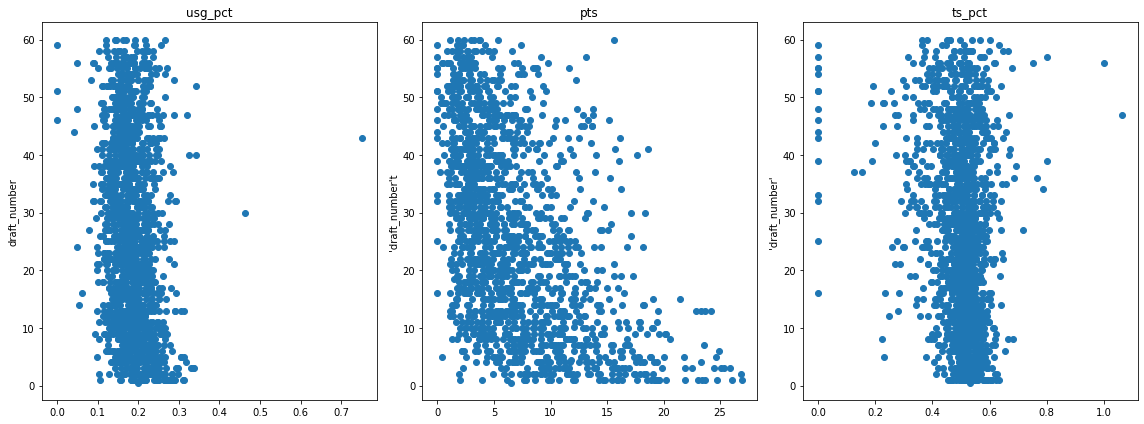

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(drafted_players_grouped['usg_pct'],drafted_players_grouped['draft_number'],'o')
axes[0].set_ylabel("draft_number")
axes[0].set_title("usg_pct")

axes[1].plot(drafted_players_grouped['pts'],drafted_players_grouped['draft_number'],'o')
axes[1].set_title("pts")
axes[1].set_ylabel("'draft_number't")

axes[2].plot(drafted_players_grouped['ts_pct'],drafted_players_grouped['draft_number'],'o')
axes[2].set_title("ts_pct");
axes[2].set_ylabel("'draft_number'")
plt.tight_layout();

In [5]:
# separate into features and labels so we will create 2 matrixes
# features - remaining columns that are not your label column
X = drafted_players_grouped.drop(columns=['draft_number', 'age', 'gp', 'Unnamed: 0', 'player_height',
                                          'player_weight'], axis=1)
print(X)
# label column
y = drafted_players_grouped['draft_number']
print(y)

from sklearn.model_selection import train_test_split

# separates the features (x) and later labels (y) - do not change the order of unpacking
# test size - what percentage of data should go to the test set (around 30 percent)
# random_state - controls the shuffling of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

                          pts       reb       ast  net_rating  oreb_pct  \
player_name                                                               
A.C. Green           5.780000  6.060000  0.860000   -1.880000  0.093000   
A.J. Bramlett        1.000000  2.800000  0.000000  -32.600000  0.158000   
A.J. Guyton          3.800000  0.700000  1.566667   -6.700000  0.013333   
AJ Hammons           2.200000  1.600000  0.200000   -0.600000  0.049000   
AJ Price             5.350000  1.333333  2.000000   -2.233333  0.017667   
...                       ...       ...       ...         ...       ...   
Zhaire Smith         3.900000  1.250000  1.000000   -2.500000  0.014000   
Zhou Qi              1.600000  0.600000  0.050000  -46.400000  0.021000   
Zion Williamson     24.750000  6.750000  2.900000    3.600000  0.086500   
Zoran Planinic       3.833333  1.333333  1.100000   -6.233333  0.036000   
Zydrunas Ilgauskas  12.938462  7.338462  1.092308    2.107692  0.124538   

                    dreb

In [6]:
X_test

,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,,,,,,,,,
Deni Avdija,6.300000,4.900000,1.200000,-2.100000,0.017000,0.181000,0.118000,0.515000,0.064000
Giannis Antetokounmpo,21.437500,9.337500,4.550000,4.512500,0.055000,0.231375,0.269500,0.590375,0.232250
Marcus Morris,9.716667,3.816667,1.366667,-2.050000,0.043167,0.135167,0.198167,0.495833,0.081500
Brandon Bass,7.816667,4.175000,0.700000,-2.258333,0.083667,0.171500,0.184500,0.545083,0.056500
Nick Van Exel,13.950000,2.890000,6.270000,-0.610000,0.014000,0.088000,0.222600,0.500100,0.315400
...,...,...,...,...,...,...,...,...,...
Solomon Hill,4.812500,2.962500,1.425000,-1.150000,0.035750,0.124000,0.121875,0.498000,0.097625
David Vaughn,3.266667,3.300000,0.266667,-5.200000,0.131333,0.209000,0.176667,0.518000,0.043000
Andrae Patterson,2.250000,1.150000,0.300000,-5.700000,0.078500,0.113500,0.152500,0.627500,0.078500


In [7]:
# help(train_test_split)

In [8]:
# creating an estimator within Sklearn
from sklearn.linear_model import LinearRegression

In [9]:
# read, look up to hyperparameters ( parameters to adjust for better performance)
# help(LinearRegression)

In [10]:
# first time use default and check default performance, after that change parameters/hyperparameters
# it creates an instance of linear regression model
# (model will 'learn' the beta coefficients for the best fitting line. 
# we did not tell the computer what those Beta coeffcient values were, it learned those through gradient descent)
model = LinearRegression()

In [11]:
# now this 'model' instance is waiting for data to be trained on
# we do it by calling fir method on model
model.fit(X_train,y_train)

LinearRegression()

In [12]:
# now we want to predict on test features and compare with y_test
test_predictions = model.predict(X_test)

# compare test predictions with y_test values (true values for X_test features)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# checking the mean value of usg_pct column 
mean_val = drafted_players_grouped['draft_number'].mean()
print(mean_val)

# checking the mean absolute error
mean_abs_err = mean_absolute_error(y_test, test_predictions)
print(mean_abs_err)
# in comparison to avg value, mean absolute error is 

25.952116564417175
11.82298813560213


In [13]:
# checking the mean squared error
mean_sqr_err = mean_squared_error(y_test, test_predictions)
print(mean_sqr_err)

# to compare with mean_val we need to use sqrt func on mean_sqr_err
# checking the root mean squared error
root_mean_sqrt_err = np.sqrt(mean_sqr_err)
print(root_mean_sqrt_err)

206.86245928578748
14.38271390544175


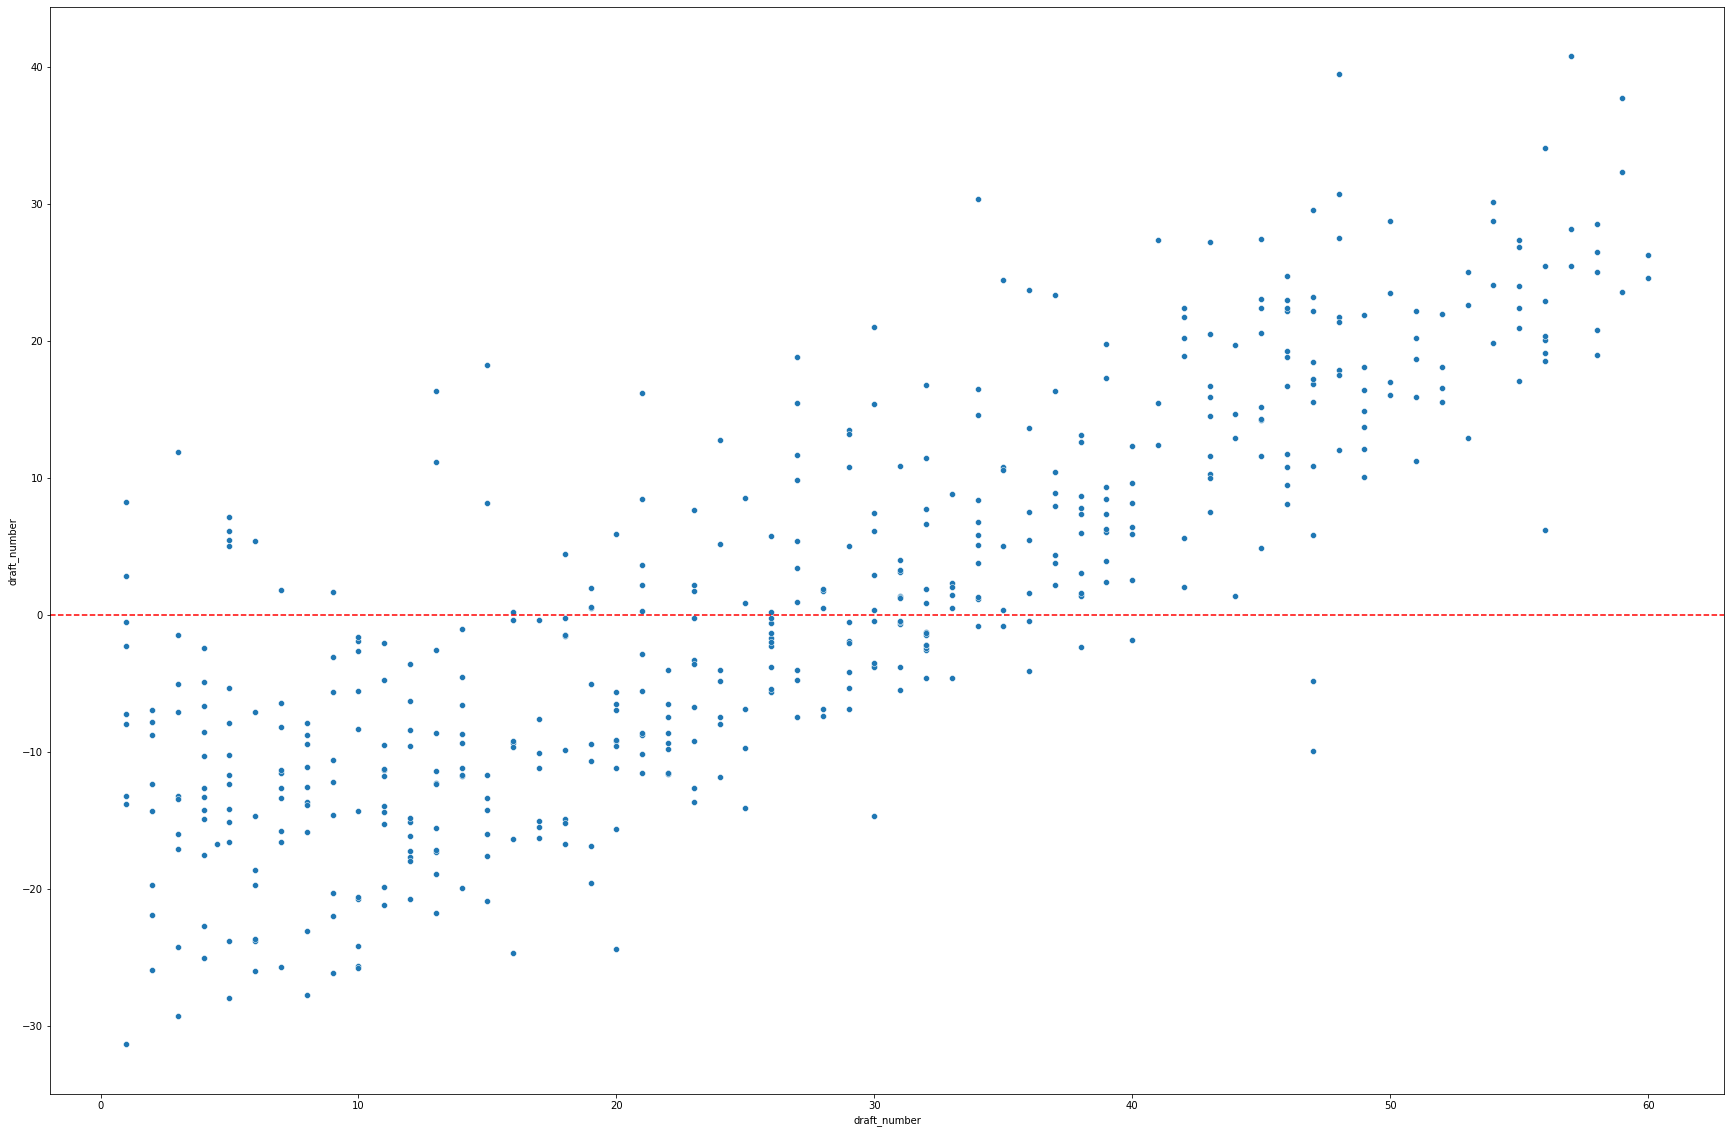

In [14]:
test_residuals = y_test - test_predictions
test_residuals
fig = plt.gcf()
fig.set_size_inches(30, 20)
# checking if using linear regression is fine, the data below should be distributed randomly
# if its not we should consider not using linear regression
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

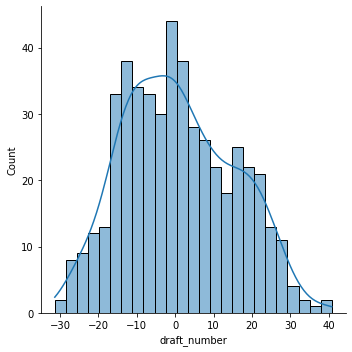

In [15]:
# check if distribution is normal
sns.displot(test_residuals, bins=25, kde=True)

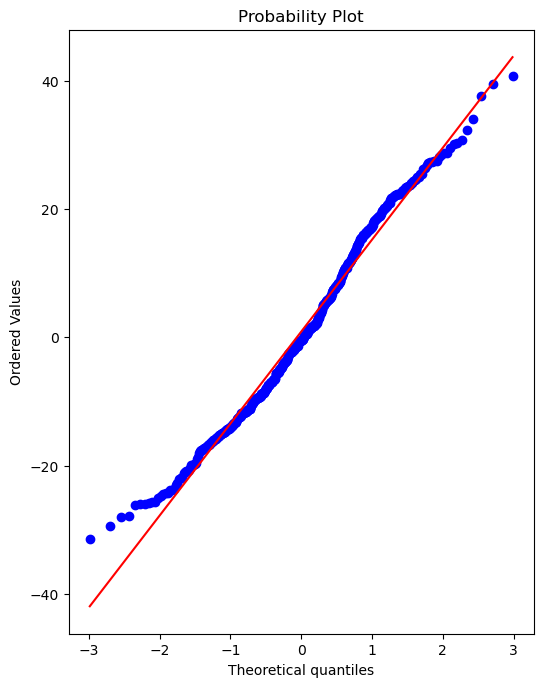

In [16]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
#probplot returns the raw values if needed
# want to see the plot, so we assign these values to
_ = sp.stats.probplot(test_residuals, plot=ax)

# The red line is 'normal distribution' 

In [17]:
# DEPLOYMENT OF THE MODEL
# this should be the same model that was adjusted on test set of data
final_model = LinearRegression()

# fit final model on a full data 
final_model.fit(X,y)

LinearRegression()

In [18]:
# checking the coefficients
# every coefficient is for another column in data

# (if coef ~ 0, there is no corelation)
final_model.coef_
# if I increase reb by one unit, i can expect decreasing draft_number by 1,82

array([-8.75799860e-01, -1.73932347e+00, -2.02291134e+00, -6.25087643e-03,
        2.86936606e+01, -9.17269037e+00, -5.42080490e+00,  4.80882010e+00,
        2.90574583e+01])

In [19]:
X.columns


Index(['pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct',
       'ts_pct', 'ast_pct'],
      dtype='object')

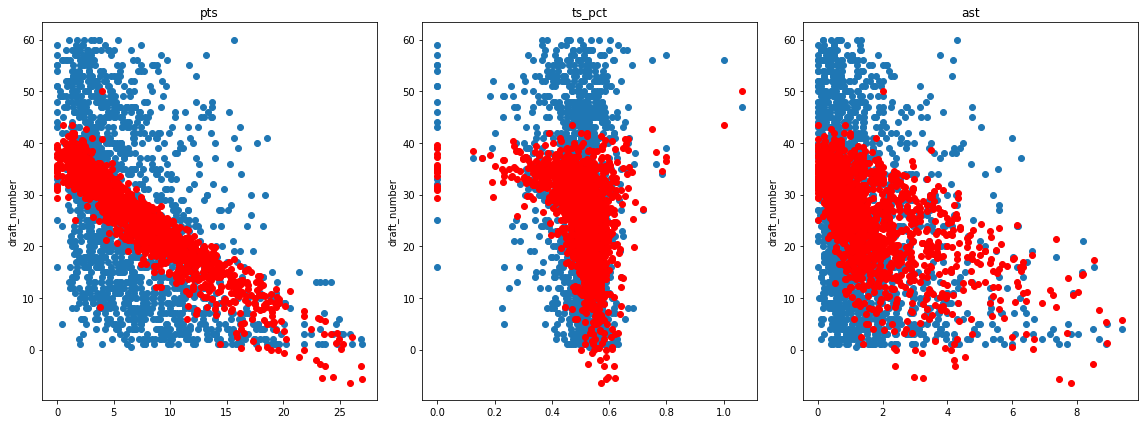

In [20]:
# showing on plot true values and values predicted by a model
y_hat = final_model.predict(X)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(drafted_players_grouped['pts'],drafted_players_grouped['draft_number'],'o')
axes[0].plot(drafted_players_grouped['pts'],y_hat,'o',color='red')
axes[0].set_ylabel('draft_number')
axes[0].set_title("pts")

axes[1].plot(drafted_players_grouped['ts_pct'],drafted_players_grouped['draft_number'],'o')
axes[1].plot(drafted_players_grouped['ts_pct'],y_hat,'o',color='red')
axes[1].set_title("ts_pct")
axes[1].set_ylabel('draft_number')

axes[2].plot(drafted_players_grouped['ast'],drafted_players_grouped['draft_number'],'o')
axes[2].plot(drafted_players_grouped['ast'],y_hat,'o',color='red')
axes[2].set_title("ast");
axes[2].set_ylabel('draft_number')
plt.tight_layout();

# red color are values predicted by a model
# we can see that the model is not precise. We can try to use some different model to get the answer for 
# our main question.

In [21]:
# DEPLOING A MODEL
from joblib import dump, load
# now we are saving a model
dump(final_model, 'final_draft_predict.joblib')

['final_draft_predict.joblib']

In [22]:
# loading ready model 
loaded_model = load('final_draft_predict.joblib')

# model coeficients:
loaded_model.coef_

array([-8.75799860e-01, -1.73932347e+00, -2.02291134e+00, -6.25087643e-03,
        2.86936606e+01, -9.17269037e+00, -5.42080490e+00,  4.80882010e+00,
        2.90574583e+01])

In [23]:
# Lets try to predict draft number for a player with stats like these:
# something around Lebron James career stats:
some_guy = [[27, 9, 7, 2.5, 0.08, 0.05, 0.3, 0.55, 0.3]]

In [24]:
loaded_model.predict(some_guy)
# we can see that prediction is not accurate, we should have in mind Root mean squared error = 14.38271390544175
# this is pretty big error for such a data set

array([-6.7722319])

In [25]:
# Now we will try to use Polynomial Regression for this data

In [26]:
X_poly = drafted_players_grouped.drop(columns=['draft_number', 'age', 'gp', 'Unnamed: 0', 'player_height',
                                          'player_weight'], axis=1)
print(X_poly)
# label column
y_poly = drafted_players_grouped['draft_number']
print(y_poly)

from sklearn.preprocessing import PolynomialFeatures

# degree - it will create x^2 plot and include_bias - it will create columns of 1
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)

                          pts       reb       ast  net_rating  oreb_pct  \
player_name                                                               
A.C. Green           5.780000  6.060000  0.860000   -1.880000  0.093000   
A.J. Bramlett        1.000000  2.800000  0.000000  -32.600000  0.158000   
A.J. Guyton          3.800000  0.700000  1.566667   -6.700000  0.013333   
AJ Hammons           2.200000  1.600000  0.200000   -0.600000  0.049000   
AJ Price             5.350000  1.333333  2.000000   -2.233333  0.017667   
...                       ...       ...       ...         ...       ...   
Zhaire Smith         3.900000  1.250000  1.000000   -2.500000  0.014000   
Zhou Qi              1.600000  0.600000  0.050000  -46.400000  0.021000   
Zion Williamson     24.750000  6.750000  2.900000    3.600000  0.086500   
Zoran Planinic       3.833333  1.333333  1.100000   -6.233333  0.036000   
Zydrunas Ilgauskas  12.938462  7.338462  1.092308    2.107692  0.124538   

                    dreb

In [27]:
# we dont need to split (training, test data) it just yet, bcs its not machine learning model, 
# its feature converter
polynomial_converter.fit(X_poly)
poly_features = polynomial_converter.transform(X_poly)
poly_features.shape

(1630, 9)

In [28]:
poly_features[0]

array([ 5.78  ,  6.06  ,  0.86  , -1.88  ,  0.093 ,  0.1864,  0.1274,
        0.4868,  0.054 ])

In [29]:
from sklearn.model_selection import train_test_split

# changing X to poly_features (features with more columns)
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(poly_features, y_poly, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
poly_model = LinearRegression()

In [32]:
poly_model.fit(poly_X_train, poly_y_train)

LinearRegression()

In [33]:
poly_test_predictions = poly_model.predict(poly_X_test)

In [34]:
poly_model.coef_

array([ -1.01845071,  -1.87609549,  -1.9162291 ,   0.05225076,
        42.44319559, -14.87098911,   9.4345501 ,  12.1022632 ,
        22.33176626])

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
MAE = mean_absolute_error(poly_y_test, poly_test_predictions)
MAE

11.822988135602131

In [37]:
MSE = mean_squared_error(poly_y_test, poly_test_predictions)
MSE

206.86245928578754

In [38]:
RMSE = np.sqrt(MSE)
RMSE

14.382713905441753

In [39]:
# creating a loop for polynomial regression to check how our reggresion behaves on different function degree
#

train_RMSE_error = []
test_RMSE_error = []

for d in range(1,10):
    poly_converter1 = PolynomialFeatures(degree = d, include_bias=False)
    poly_features1 = poly_converter1.fit_transform(X_poly)
    
    poly2_X_train, poly2_X_test, poly2_y_train, poly2_y_test = train_test_split(poly_features1, y_poly, test_size=0.3, random_state=101)
    
    poly2_model = LinearRegression()
    poly2_model.fit(poly2_X_train, poly2_y_train)
    
    poly2_train_pred = poly2_model.predict(poly2_X_train)
    poly2_test_pred = poly2_model.predict(poly2_X_test)
    
    poly2_train_rmse = np.sqrt(mean_squared_error(poly2_y_train, poly2_train_pred))
    poly2_test_rmse = np.sqrt(mean_squared_error(poly2_y_test, poly2_test_pred))
    
    train_RMSE_error.append(poly2_train_rmse)
    test_RMSE_error.append(poly2_test_rmse)

In [40]:
# it behaves naturally - when we increases degree of a function, the rmse gettin lower 
# (for higher degrees we got some anomaly maybe due to huge overfitting)
train_RMSE_error

[13.584886496891254,
 12.99862351494358,
 11.910747265782394,
 8.297084061825593,
 6.01332468502136,
 4.849108976792481,
 3.508998841045108,
 7.274335463570134,
 11.478209166979132]

In [41]:
test_RMSE_error

[14.382713905441753,
 17.68741684995159,
 56.89920872842505,
 2968.0074871847924,
 1773319.3089665882,
 20119170.051936395,
 161215599.02766538,
 563389329.8388711,
 3803240998.479041]

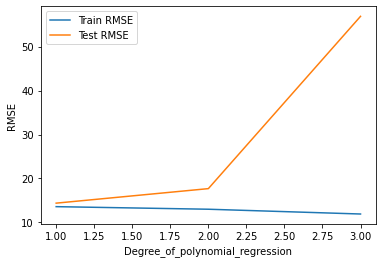

In [42]:
plt.plot(range(1, 4), train_RMSE_error[:3], label='Train RMSE')
plt.plot(range(1, 4), test_RMSE_error[:3], label='Test RMSE')
plt.xlabel('Degree_of_polynomial_regression')
plt.ylabel('RMSE')
plt.legend()

# based on both train_RMSE_error and test_RMSE_error - the model is overfitted and does not give 
# results that we expected. RMSE for trainig data is decreasing but RMSE for test data does not follow
# this trend.
# The next step would be to regularize data and check how our model would behave/change.